In [1]:
tpi_grid = pandas.read_csv('https://psl.noaa.gov/data/timeseries/IPOTPI/tpi.timeseries.ersstv5.filt.data',
                           header=None, skiprows=1, skipfooter=11, sep='\s+',
                           index_col=0,
                           na_values=['-99.000'],
                           engine='python')

tpi = tpi_grid.stack(dropna=False)
times = pandas.date_range('18540101', freq='MS', periods=tpi.size)
tpi.index = times

NameError: name 'pandas' is not defined

In [2]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

In [3]:
tpi_grid = pandas.read_csv('https://psl.noaa.gov/data/timeseries/IPOTPI/tpi.timeseries.ersstv5.filt.data',
                           header=None, skiprows=1, skipfooter=11, sep='\s+',
                           index_col=0,
                           na_values=['-99.000'],
                           engine='python')

tpi = tpi_grid.stack(dropna=False)
times = pandas.date_range('18540101', freq='MS', periods=tpi.size)
tpi.index = times

In [4]:
tpi

1854-01-01   NaN
1854-02-01   NaN
1854-03-01   NaN
1854-04-01   NaN
1854-05-01   NaN
              ..
2021-08-01   NaN
2021-09-01   NaN
2021-10-01   NaN
2021-11-01   NaN
2021-12-01   NaN
Freq: MS, Length: 2016, dtype: float64

<AxesSubplot:>

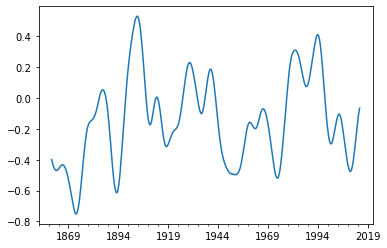

In [5]:
tpi.plot()

In [6]:
ds=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
sst=ds.sst

In [7]:
tpi_xr=xr.DataArray(tpi, coords=[('time', sst.time)])

ValueError: conflicting sizes for dimension 'time': length 2016 on the data but length 2009 on coordinate 'time'

In [8]:
tpi.to_xarray

<bound method NDFrame.to_xarray of 1854-01-01   NaN
1854-02-01   NaN
1854-03-01   NaN
1854-04-01   NaN
1854-05-01   NaN
              ..
2021-08-01   NaN
2021-09-01   NaN
2021-10-01   NaN
2021-11-01   NaN
2021-12-01   NaN
Freq: MS, Length: 2016, dtype: float64>

In [9]:
tpi.to_xarray()

<xarray.DataArray (index: 2016)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * index    (index) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

In [10]:
tpi_xr=tpi.to_xarray()

In [11]:
tpi_xr

<xarray.DataArray (index: 2016)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * index    (index) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

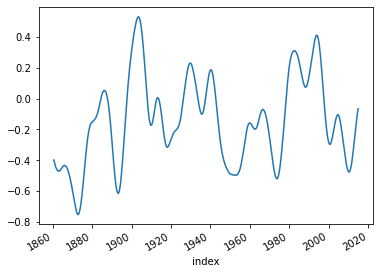

In [12]:
tpi_xr.plot()

In [13]:
tpi_withdata=tpi_xr.sel(time=slice(1860-07,2015-01))

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-13-e260c5fe6b68>, line 1)

In [14]:
tpi_withdata=tpi_xr.sel(time=slice(1860-7,2015-1))

ValueError: dimensions or multi-index levels ['time'] do not exist

In [15]:
tpi.to_xarray(coords='time')

TypeError: to_xarray() got an unexpected keyword argument 'coords'

In [16]:
tpi_xr.rename

<bound method DataArray.rename of <xarray.DataArray (index: 2016)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * index    (index) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01>

In [17]:
tpi_xr.rename('index')

<xarray.DataArray 'index' (index: 2016)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * index    (index) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

In [18]:
tpi_xr.rename('index':'time')

SyntaxError: invalid syntax (<ipython-input-18-cabdab9de654>, line 1)

In [19]:
tpi_xr.rename({'index':'time'})

<xarray.DataArray (time: 2016)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

In [20]:
tpi_xr=tpi_xr.rename({'index':'time'})

In [21]:
tpi_xr

<xarray.DataArray (time: 2016)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

In [22]:
tpi_xr.time

<xarray.DataArray 'time' (time: 2016)>
array(['1854-01-01T00:00:00.000000000', '1854-02-01T00:00:00.000000000',
       '1854-03-01T00:00:00.000000000', ..., '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

In [23]:
tpi_xr.groupby('time.month')

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [24]:
tpi_xr.groupby('time.month').mean()

<xarray.DataArray (month: 12)>
array([-0.14352258, -0.14390909, -0.14371429, -0.14353247, -0.14335714,
       -0.14320779, -0.14462581, -0.14444516, -0.14425806, -0.14412258,
       -0.14392258, -0.14374194])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [25]:
tpi_xr.groupby('time.season').mean()

<xarray.DataArray (season: 4)>
array([-0.14372414, -0.14409483, -0.14353463, -0.14410108])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [26]:
tpi=tpi_xr.sel(time=slice('1860-07,2015-01'))

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [1860-07,2015-01] of type str

In [27]:
tpi_xr.sel(time=slice('1860-07,2015-01'))

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [1860-07,2015-01] of type str

In [28]:
tpi_xr.sel(time=slice('1860,2015'))

<xarray.DataArray (time: 84)>
array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan, -0.398, -0.402,
       -0.407, -0.411, -0.415, -0.419])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 1860-12-01

In [29]:
tpi_xr.sel(time=slice('1860','2015'))

<xarray.DataArray (time: 1872)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 1860-01-01 1860-02-01 ... 2015-12-01

In [30]:
tpi_xr.sel(time=slice('1860-07','2015-01'))

<xarray.DataArray (time: 1855)>
array([-0.398, -0.402, -0.407, ..., -0.078, -0.072, -0.066])
Coordinates:
  * time     (time) datetime64[ns] 1860-07-01 1860-08-01 ... 2015-01-01

In [31]:
tpi_xr.sel(time=slice('1860-06','2015-02'))

<xarray.DataArray (time: 1857)>
array([   nan, -0.398, -0.402, ..., -0.072, -0.066,    nan])
Coordinates:
  * time     (time) datetime64[ns] 1860-06-01 1860-07-01 ... 2015-02-01

In [32]:
tpi=tpi_xr.sel(time=slice('1860-07','2015-01'))

In [33]:
tpi

<xarray.DataArray (time: 1855)>
array([-0.398, -0.402, -0.407, ..., -0.078, -0.072, -0.066])
Coordinates:
  * time     (time) datetime64[ns] 1860-07-01 1860-08-01 ... 2015-01-01

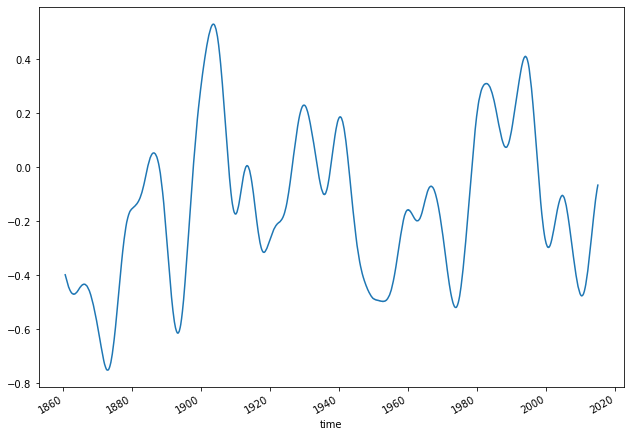

In [34]:
tpi.plot(size=7)

In [35]:
ds2=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')
rr=ds2.rr
land_sea_ds = xr.open_dataset('/g/data/eg3/pfd548/gridarea/land-sea_mask/fractional_land.1.5-deg.nc')
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xr.open_dataset(url).sftlf
nw_area=rr.sel(lat=slice(-26,-10),lon=slice(112,138))
ne_area=rr.sel(lat=slice(-26,-10),lon=slice(138,156))
nw_land=nw_area.where(landfrac>0)
ne_land=ne_area.where(landfrac>0)
nw_climate=nw_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
ne_climate=ne_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
nw_anomaly=(nw_land.groupby('time.month')-nw_climate).mean(dim=['lon','lat'])
ne_anomaly=(ne_land.groupby('time.month')-ne_climate).mean(dim=['lon','lat'])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:572: SerializationWarning: Unable to decode time axis into 

In [36]:
tpi

<xarray.DataArray (time: 1855)>
array([-0.398, -0.402, -0.407, ..., -0.078, -0.072, -0.066])
Coordinates:
  * time     (time) datetime64[ns] 1860-07-01 1860-08-01 ... 2015-01-01

In [37]:
nw_anomaly

<xarray.DataArray 'rr' (time: 1392)>
array([-2.3136253 , -2.5076315 ,  1.2648083 , ..., -0.24307512,
        0.0867044 ,  2.8002036 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [38]:
ne_anomaly

<xarray.DataArray 'rr' (time: 1392)>
array([ 0.5196536 , -5.6413965 , -3.4897928 , ..., -0.56317997,
       -0.34618732,  1.3107754 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [39]:
tpi_modern=tpi.sel(time=slice('1900','2014'))
nw_modern=nw_anomaly.sel(time=slice('1900','2014'))
ne_modern=ne_anomaly.sel(time=slice('1900','2014'))

In [40]:
tpi_modern

<xarray.DataArray (time: 1380)>
array([ 0.312,  0.32 ,  0.328, ..., -0.084, -0.078, -0.072])
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2014-12-01

In [41]:
nw_modern

<xarray.DataArray 'rr' (time: 1380)>
array([-2.3136253 , -2.5076315 ,  1.2648083 , ..., -0.38769045,
        0.20279613,  1.214732  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [42]:
ne_modern

<xarray.DataArray 'rr' (time: 1380)>
array([ 0.5196536, -5.6413965, -3.4897928, ..., -0.9338028, -1.0098171,
       -0.7812554], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [43]:
import scipy.stats

In [44]:
scipy.stats.pearsonr(tpi,nw_modern)

ValueError: x and y must have the same length.

In [45]:
scipy.stats.pearsonr(tpi_modern,nw_modern)

(-0.06183767723324518, 0.02160252537938839)

In [46]:
scipy.stats.pearsonr(tpi_modern,ne_modern)

(-0.15849593394692843, 3.2197193044849827e-09)

In [47]:
nw_DJF=nw_modern.groupby('time.season')['DJF']
ne_DJF=ne_modern.groupby('time.season')['DJF']
nw_SON=nw_modern.groupby('time.season')['SON']
ne_SON=ne_modern.groupby('time.season')['SON']
nw_MAM=nw_modern.groupby('time.season')['MAM']
ne_MAM=ne_modern.groupby('time.season')['MAM']
tpi_DJF=tpi_modern.groupby('time.season')['DJF']
tpi_summer=tpi_DJF.resample(time='AS-DEC').mean()
nw_summer=nw_DJF.resample(time='AS-DEC').mean()
ne_summer=ne_DJF.resample(time='AS-DEC').mean()
tpi_SON=tpi_modern.groupby('time.season')['SON']
tpi_spring=tpi_SON.resample(time='AS-SEP').mean()
nw_spring=nw_SON.resample(time='AS-SEP').mean()
ne_spring=ne_SON.resample(time='AS-SEP').mean()
tpi_MAM=tpi_modern.groupby('time.season')['MAM']
tpi_autumn=tpi_MAM.resample(time='AS-MAR').mean()
nw_autumn=nw_MAM.resample(time='AS-MAR').mean()
ne_autumn=ne_MAM.resample(time='AS-MAR').mean()

In [48]:
tpi_DJF

<xarray.DataArray (time: 345)>
array([ 0.312,  0.32 ,  0.398,  0.405,  0.412,  0.473,  0.479,  0.484,
        0.522,  0.524,  0.526,  0.524,  0.521,  0.518,  0.461,  0.453,
        0.444,  0.335,  0.322,  0.309,  0.169,  0.155,  0.14 , -0.001,
       -0.014, -0.027, -0.129, -0.136, -0.142, -0.173, -0.173, -0.172,
       -0.134, -0.128, -0.122, -0.053, -0.047, -0.041,  0.002,  0.003,
        0.005, -0.009, -0.012, -0.017, -0.08 , -0.088, -0.096, -0.183,
       -0.192, -0.201, -0.273, -0.279, -0.284, -0.314, -0.314, -0.315,
       -0.302, -0.3  , -0.297, -0.267, -0.264, -0.261, -0.233, -0.23 ,
       -0.228, -0.211, -0.21 , -0.209, -0.2  , -0.198, -0.197, -0.177,
       -0.174, -0.171, -0.124, -0.118, -0.112, -0.039, -0.031, -0.023,
        0.06 ,  0.068,  0.077,  0.151,  0.158,  0.164,  0.213,  0.216,
        0.219,  0.23 ,  0.229,  0.228,  0.201,  0.197,  0.193,  0.139,
        0.133,  0.127,  0.062,  0.055,  0.048, -0.02 , -0.027, -0.033,
       -0.083, -0.087, -0.09 , -0.099, -0.097, -0.095, -0.05 , -0.044,
       -0.037,  0.04 ,  0.048,  0.056,  0.13 ,  0.137,  0.143,  0.183,
        0.184,  0.186,  0.172,  0.168,  0.163,  0.097,  0.088,  0.079,
       -0.021, -0.032, -0.043, -0.151, -0.161, -0.171, -0.265, -0.273,
       -0.282, -0.35 , -0.356, -0.361, -0.405, -0.409, -0.412, -0.442,
       -0.445, -0.448, -0.47 , -0.472, -0.474, -0.486, -0.487, -0.488,
       -0.492, -0.492, -0.492, -0.495, -0.495, -0.496, -0.496, -0.496,
...
       -0.168, -0.164, -0.121, -0.117, -0.112, -0.08 , -0.077, -0.076,
       -0.072, -0.073, -0.074, -0.099, -0.103, -0.107, -0.158, -0.164,
       -0.17 , -0.241, -0.248, -0.256, -0.339, -0.347, -0.355, -0.433,
       -0.44 , -0.446, -0.499, -0.502, -0.506, -0.519, -0.518, -0.516,
       -0.477, -0.47 , -0.464, -0.376, -0.365, -0.354, -0.238, -0.226,
       -0.214, -0.084, -0.071, -0.058,  0.07 ,  0.082,  0.094,  0.196,
        0.205,  0.213,  0.272,  0.276,  0.28 ,  0.304,  0.306,  0.307,
        0.309,  0.309,  0.308,  0.291,  0.288,  0.285,  0.246,  0.241,
        0.236,  0.182,  0.176,  0.17 ,  0.118,  0.114,  0.109,  0.078,
        0.077,  0.075,  0.082,  0.084,  0.087,  0.133,  0.139,  0.146,
        0.213,  0.22 ,  0.227,  0.298,  0.305,  0.312,  0.374,  0.379,
        0.383,  0.41 ,  0.411,  0.41 ,  0.378,  0.371,  0.365,  0.271,
        0.26 ,  0.248,  0.115,  0.101,  0.087, -0.052, -0.066, -0.079,
       -0.193, -0.202, -0.212, -0.278, -0.282, -0.285, -0.295, -0.293,
       -0.291, -0.251, -0.246, -0.24 , -0.181, -0.175, -0.169, -0.122,
       -0.119, -0.116, -0.106, -0.107, -0.109, -0.148, -0.154, -0.16 ,
       -0.233, -0.241, -0.249, -0.331, -0.339, -0.347, -0.418, -0.424,
       -0.43 , -0.47 , -0.472, -0.474, -0.466, -0.462, -0.459, -0.399,
       -0.391, -0.383, -0.289, -0.278, -0.268, -0.166, -0.157, -0.148,
       -0.072])
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2014-12-01

In [49]:
tpi_summer

<xarray.DataArray (time: 116)>
array([ 0.316     ,  0.405     ,  0.47866667,  0.524     ,  0.521     ,
        0.45266667,  0.322     ,  0.15466667, -0.014     , -0.13566667,
       -0.17266667, -0.128     , -0.047     ,  0.00333333, -0.01266667,
       -0.088     , -0.192     , -0.27866667, -0.31433333, -0.29966667,
       -0.264     , -0.23033333, -0.21      , -0.19833333, -0.174     ,
       -0.118     , -0.031     ,  0.06833333,  0.15766667,  0.216     ,
        0.229     ,  0.197     ,  0.133     ,  0.055     , -0.02666667,
       -0.08666667, -0.097     , -0.04366667,  0.048     ,  0.13666667,
        0.18433333,  0.16766667,  0.088     , -0.032     , -0.161     ,
       -0.27333333, -0.35566667, -0.40866667, -0.445     , -0.472     ,
       -0.487     , -0.492     , -0.49533333, -0.496     , -0.48666667,
       -0.45766667, -0.4       , -0.321     , -0.23733333, -0.176     ,
       -0.15766667, -0.171     , -0.19266667, -0.196     , -0.16766667,
       -0.11666667, -0.07766667, -0.073     , -0.103     , -0.164     ,
       -0.24833333, -0.347     , -0.43966667, -0.50233333, -0.51766667,
       -0.47033333, -0.365     , -0.226     , -0.071     ,  0.082     ,
        0.20466667,  0.276     ,  0.30566667,  0.30866667,  0.288     ,
        0.241     ,  0.176     ,  0.11366667,  0.07666667,  0.08433333,
        0.13933333,  0.22      ,  0.305     ,  0.37866667,  0.41033333,
        0.37133333,  0.25966667,  0.101     , -0.06566667, -0.20233333,
       -0.28166667, -0.293     , -0.24566667, -0.175     , -0.119     ,
       -0.10733333, -0.154     , -0.241     , -0.339     , -0.424     ,
       -0.472     , -0.46233333, -0.391     , -0.27833333, -0.157     ,
       -0.072     ])
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01

In [50]:
tpi_spring

<xarray.DataArray (time: 115)>
array([ 3.83000000e-01,  4.62000000e-01,  5.16000000e-01,  5.27666667e-01,
        4.76666667e-01,  3.59333333e-01,  1.98333333e-01,  2.53333333e-02,
       -1.12666667e-01, -1.71666667e-01, -1.45000000e-01, -6.70000000e-02,
       -4.00000000e-03, -2.33333333e-03, -6.53333333e-02, -1.66000000e-01,
       -2.60666667e-01, -3.11000000e-01, -3.06000000e-01, -2.73333333e-01,
       -2.37666667e-01, -2.14000000e-01, -2.02000000e-01, -1.82333333e-01,
       -1.35666667e-01, -5.46666667e-02,  4.36666667e-02,  1.38000000e-01,
        2.05000000e-01,  2.30000000e-01,  2.08666667e-01,  1.50666667e-01,
        7.53333333e-02, -7.00000000e-03, -7.56666667e-02, -1.00333333e-01,
       -6.20000000e-02,  2.40000000e-02,  1.17000000e-01,  1.78000000e-01,
        1.78000000e-01,  1.13000000e-01,  3.33333333e-04, -1.29666667e-01,
       -2.47666667e-01, -3.38666667e-01, -3.97666667e-01, -4.37000000e-01,
       -4.66000000e-01, -4.85000000e-01, -4.91333333e-01, -4.94666667e-01,
       -4.96666667e-01, -4.90666667e-01, -4.67000000e-01, -4.17000000e-01,
       -3.42000000e-01, -2.57000000e-01, -1.87333333e-01, -1.58333333e-01,
       -1.66000000e-01, -1.88000000e-01, -1.98000000e-01, -1.78000000e-01,
       -1.29666667e-01, -8.43333333e-02, -7.06666667e-02, -9.20000000e-02,
       -1.46333333e-01, -2.25333333e-01, -3.21666667e-01, -4.18666667e-01,
       -4.90666667e-01, -5.19000000e-01, -4.88000000e-01, -3.95666667e-01,
       -2.63000000e-01, -1.11000000e-01,  4.53333333e-02,  1.78666667e-01,
        2.63000000e-01,  3.01000000e-01,  3.10000000e-01,  2.95666667e-01,
        2.55000000e-01,  1.93000000e-01,  1.28000000e-01,  8.23333333e-02,
        7.80000000e-02,  1.22333333e-01,  1.99000000e-01,  2.84000000e-01,
        3.62666667e-01,  4.08333333e-01,  3.88666667e-01,  2.93000000e-01,
        1.43000000e-01, -2.53333333e-02, -1.72666667e-01, -2.68000000e-01,
       -2.96333333e-01, -2.61000000e-01, -1.92000000e-01, -1.30000000e-01,
       -1.04333333e-01, -1.37000000e-01, -2.17000000e-01, -3.14666667e-01,
       -4.05333333e-01, -4.65000000e-01, -4.71000000e-01, -4.14000000e-01,
       -3.09000000e-01, -1.86000000e-01, -8.43333333e-02])
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01

In [51]:
tpi_autumn

<xarray.DataArray (time: 115)>
array([ 0.33633333,  0.42533333,  0.49333333,  0.52833333,  0.51066667,
        0.425     ,  0.28266667,  0.11066667, -0.051     , -0.15333333,
       -0.168     , -0.10833333, -0.02933333,  0.006     , -0.027     ,
       -0.11333333, -0.217     , -0.293     , -0.31466667, -0.29133333,
       -0.255     , -0.224     , -0.207     , -0.19433333, -0.163     ,
       -0.09866667, -0.00633333,  0.093     ,  0.176     ,  0.224     ,
        0.225     ,  0.183     ,  0.11433333,  0.034     , -0.045     ,
       -0.095     , -0.089     , -0.023     ,  0.072     ,  0.15366667,
        0.18633333,  0.15333333,  0.06066667, -0.065     , -0.191     ,
       -0.29733333, -0.371     , -0.419     , -0.45266667, -0.47666667,
       -0.48866667, -0.493     , -0.496     , -0.49533333, -0.482     ,
       -0.446     , -0.38166667, -0.29933333, -0.21866667, -0.16733333,
       -0.159     , -0.177     , -0.196     , -0.19233333, -0.15566667,
       -0.10433333, -0.073     , -0.077     , -0.11533333, -0.18333333,
       -0.272     , -0.372     , -0.459     , -0.51133333, -0.51166667,
       -0.44866667, -0.33266667, -0.18833333, -0.032     ,  0.11666667,
        0.227     ,  0.287     ,  0.30833333,  0.306     ,  0.27866667,
        0.226     ,  0.15933333,  0.101     ,  0.07433333,  0.09433333,
        0.15833333,  0.24133333,  0.32533333,  0.392     ,  0.40766667,
        0.34933333,  0.22266667,  0.059     , -0.10366667, -0.228     ,
       -0.29066667, -0.28566667, -0.22866667, -0.15833333, -0.111     ,
       -0.11333333, -0.173     , -0.265     , -0.36233333, -0.44033333,
       -0.47566667, -0.45      , -0.36566667, -0.24733333, -0.13      ])
Coordinates:
  * time     (time) datetime64[ns] 1900-03-01 1901-03-01 ... 2014-03-01

In [52]:
nw_summer

<xarray.DataArray 'rr' (time: 116)>
array([-2.4106283 , -0.60411364,  0.0628742 , -0.42388725,  0.83810943,
       -1.0424823 , -1.244104  ,  0.72458607, -0.09733916, -0.8472268 ,
       -1.0162631 , -0.9143324 , -0.26968148, -0.4009281 , -0.07871437,
        0.5550329 , -0.02266783,  0.36610386,  1.0544047 ,  0.12507507,
       -0.35668182,  1.1666913 , -0.25724456,  0.06173615, -0.42350233,
        0.5079048 , -0.19410507,  0.78678274, -1.0937552 ,  0.0800999 ,
        0.2691281 ,  0.35413018, -0.64106995, -0.740427  ,  0.32068178,
       -1.045404  , -1.0587416 ,  0.2452975 ,  0.53075093,  0.19764352,
        0.19103535, -0.8151231 ,  0.974773  , -0.16972204, -0.6711262 ,
       -0.21835959,  1.4540182 , -0.41591462, -0.34364188, -0.4904252 ,
        0.47298384,  0.65066737, -1.5875359 , -0.9475727 , -0.90484315,
       -0.25383762,  0.07551893, -0.41784036, -0.57417995, -0.9594564 ,
        0.71566933,  0.06333604,  0.46482924,  0.7163643 , -1.1085616 ,
       -1.6595712 ,  0.5188847 ,  1.5379071 ,  0.6481766 ,  0.89636534,
       -1.3447529 , -0.59375614, -0.7002606 , -0.08254451,  2.630129  ,
        0.58345056,  1.6199538 , -0.0170633 ,  0.7868266 , -0.48141512,
        1.1377124 ,  1.4893414 ,  1.744668  , -1.182355  ,  1.0179948 ,
       -0.5328071 , -0.18049137,  1.0486189 , -0.7817435 , -0.6620848 ,
       -0.765371  ,  1.4457731 , -1.4552355 ,  1.1603503 ,  0.49338984,
        1.4842798 , -0.7261135 ,  2.5013301 ,  0.14150655,  1.8830789 ,
        1.9540476 ,  2.2594633 ,  0.86048007,  0.45188728,  1.8936357 ,
       -1.0992584 ,  1.1831064 , -0.17877348,  0.79839706,  1.8614397 ,
        0.8433079 ,  2.9814968 ,  0.31079522,  0.13066058,  1.896933  ,
        1.214732  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01

In [53]:
ne_summer

<xarray.DataArray 'rr' (time: 116)>
array([-2.5608714 , -1.1204972 , -3.2176273 , -1.7974163 , -0.21904759,
       -1.6000814 , -0.82506007, -0.14285368,  0.7975839 , -2.0463083 ,
        1.0016216 ,  1.7601079 , -2.4838603 ,  0.20171328, -0.01700811,
       -2.3144743 , -0.3464749 ,  1.329615  ,  2.0520754 , -1.1706494 ,
       -1.0970784 , -0.32226667,  0.5253468 , -1.6714998 , -1.0742146 ,
        0.15932898, -2.6536229 ,  0.59074104, -0.5780104 ,  0.13233563,
        0.6970379 , -2.3905182 , -1.7422224 , -0.16475527,  0.5661781 ,
       -2.7334669 , -0.8256161 , -1.0542394 , -0.37066033,  0.17593662,
        0.92877275, -0.41035345, -1.4303671 ,  0.33997336, -0.13987803,
       -0.5370738 ,  0.30938432, -0.82079035, -1.6340593 , -0.7118926 ,
        0.45983252,  1.6674341 , -1.8981047 ,  1.0478452 ,  0.7450228 ,
        0.745694  , -0.11963781,  0.7480326 , -1.1524588 , -0.9137995 ,
       -0.37184045, -1.7036492 ,  0.11686835, -0.03874277, -1.1607019 ,
       -1.8083205 , -0.59816486, -1.0025002 ,  0.77330846, -1.8861752 ,
       -0.837997  , -0.40772358,  0.6391721 , -0.7203727 ,  4.597909  ,
       -0.3066626 ,  2.3333213 ,  1.4589801 , -1.3487153 ,  1.322585  ,
       -1.1103282 ,  2.077422  , -1.886356  , -3.4694755 ,  0.29039305,
       -1.8246919 , -1.8110467 , -1.1766373 , -2.4229841 , -1.0892967 ,
       -3.4440708 ,  2.9604962 , -1.6628337 ,  0.32009032, -1.0764112 ,
       -1.0871426 , -1.395979  , -0.25373307,  0.21681254,  0.25839922,
        0.28548446,  0.8571195 , -1.0700777 , -1.1304501 ,  0.13914323,
       -1.4059733 , -1.6809047 , -0.31373462,  0.75326794,  2.5356054 ,
        0.81707805,  1.7075249 , -0.21395211, -1.7845432 , -0.42204165,
       -0.7812554 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01

In [54]:
nw_autmn

NameError: name 'nw_autmn' is not defined

In [55]:
nw_autumn

<xarray.DataArray 'rr' (time: 115)>
array([ 0.7383943 , -0.05375201, -1.101982  ,  0.44624057,  0.7664494 ,
       -0.71257967, -1.1905218 , -0.34184372,  0.1891609 , -0.03080907,
        0.76541334, -0.38901058, -0.12442257, -0.30544034, -0.3304509 ,
       -0.55084324, -0.1705577 , -0.08630117, -1.0107204 , -0.41757166,
       -0.160482  ,  0.59962684,  0.5766551 ,  0.7017834 , -0.98951703,
        0.18735522,  0.5265543 , -0.1746916 , -0.34955192,  0.3917221 ,
       -0.39773157,  0.48873886,  0.02313522,  0.6547628 ,  0.7212651 ,
        0.5254633 , -0.64193577, -0.37116614, -1.1106011 , -0.4210007 ,
       -0.42082572,  0.4290053 , -0.01093759,  0.2507082 ,  0.031099  ,
       -0.13297667, -1.0463957 ,  0.2981849 ,  0.4139907 ,  0.0213906 ,
       -0.5415714 , -0.9886897 , -0.7334021 , -0.04326263,  0.14769249,
        0.48991862, -0.20547456, -0.07819352, -0.4292524 ,  0.25923714,
        0.30656555, -0.516777  , -0.88604116,  0.0256498 ,  0.12101766,
        0.45885095, -0.5620093 , -0.3751169 ,  0.8195884 , -0.22794975,
       -0.07872351,  0.35897458,  0.20532744,  0.5137487 ,  1.0543901 ,
        0.03566803,  0.05643366,  0.66972524, -0.25838286,  0.40205812,
       -0.24224837, -0.6818657 ,  0.16579264,  1.4887662 ,  0.49778643,
        0.17731029, -0.7368455 , -0.95111936,  0.21662919,  1.3439533 ,
       -0.46199796, -0.83539724, -0.08733175, -0.74481577, -0.54205674,
        0.17710353,  0.48157486, -0.34439576, -0.17807305,  0.47696352,
        2.243401  ,  0.9563038 , -0.9396202 , -0.40864098,  0.75024015,
       -0.41929135,  1.4109133 ,  1.2681476 , -0.38611305, -0.8296644 ,
        0.51969165,  1.9323319 ,  0.8230672 ,  0.43489423, -0.20099129],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-03-01 1901-03-01 ... 2014-03-01

In [56]:
scipy.stats.ttest_ind(tpi_spring,nw_spring)

Ttest_indResult(statistic=-2.2158098875606176, pvalue=0.027693079202118297)

In [57]:
scipy.stats.pearsonr(tpi_spring,nw_spring)

(-0.2514006746458402, 0.006724424871777505)

In [58]:
scipy.stats.pearsonr(tpi_spring,ne_spring)

(-0.2605119339233398, 0.004925220257618918)

In [59]:
scipy.stats.pearsonr(tpi_summer,nw_summer)

(-0.11075540455519571, 0.23657176728525012)

In [60]:
scipy.stats.pearsonr(tpi_summer,ne_summer)

(-0.3557513284129132, 8.889030586496053e-05)

In [61]:
scipy.stats.pearsonr(tpi_autumn,nw_autumn)

(-0.12565380592169784, 0.18087146931732162)

In [62]:
scipy.stats.pearsonr(tpi_autumn,ne_autumn)

(-0.1828827208662402, 0.05042909764110121)

In [63]:
def correlate_tpi(data, tpi_index):
    r, p = scipy.stats.pearsonr(data, tpi_index)
    return r

In [64]:
rr

<xarray.DataArray 'rr' (time: 1392, lat: 139, lon: 178)>
[34440864 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

In [65]:
rr_modern=rr.sel(time=slice('1900','2014'))
rr_DJF=rr_modern.groupby('time.season')['DJF']
rr_SON=rr_modern.groupby('time.season')['SON']
rr_MAM=rr_modern.groupby('time.season')['MAM']
tpi_spatial=np.apply_along_axis(correlate_tpi, 0, rr_modern, tpi_modern)
tpi_SON_spatial=np.apply_along_axis(correlate_tpi, 0, rr_SON, tpi_SON)
tpi_DJF_spatial=np.apply_along_axis(correlate_tpi, 0, rr_DJF, tpi_DJF)
tpi_MAM_spatial=np.apply_along_axis(correlate_tpi, 0, rr_MAM, tpi_MAM)
tpi_spatial_da=xr.DataArray(tpi_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
tpi_SON_spatial_da=xr.DataArray(tpi_SON_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
tpi_DJF_spatial_da=xr.DataArray(tpi_DJF_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])
tpi_MAM_spatial_da=xr.DataArray(tpi_MAM_spatial, coords=[('lat', rr.lat), ('lon', rr.lon)])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [66]:
rr_DJF

<xarray.DataArray 'rr' (time: 345, lat: 139, lon: 178)>
array([[[0.000000e+00, 0.000000e+00, ..., 2.048290e-02, 1.404263e-02],
        [0.000000e+00, 0.000000e+00, ..., 2.427456e-02, 1.214987e-02],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[0.000000e+00, 0.000000e+00, ..., 5.005125e-03, 3.221060e-03],
        [0.000000e+00, 0.000000e+00, ..., 5.861955e-03, 2.631207e-03],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 5.611501e+00, 5.717206e+00],
        [0.000000e+00, 0.000000e+00, ..., 5.566589e+00, 5.687929e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 3.127996e-05, 2.193591e-05],
        [0.000000e+00, 0.000000e+00, ..., 1.860765e-05, 1.761148e-05]],

       [[0.000000e+00, 0.000000e+00, ..., 4.879928e+00, 4.945510e+00],
        [0.000000e+00, 0.000000e+00, ..., 4.859588e+00, 4.926849e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 2.930378e-05, 1.988834e-05],
        [0.000000e+00, 0.000000e+00, ..., 1.736313e-05, 1.587353e-05]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

In [67]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(tpi_spatial_da.lon, tpi_spatial_da.lat, tpi_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('TPI spatial correlation')

NameError: name 'ccrs' is not defined

<Figure size 1440x1440 with 0 Axes>

In [68]:
import cartopy.crs as ccrs

Text(0.5, 1.0, 'TPI spatial correlation')

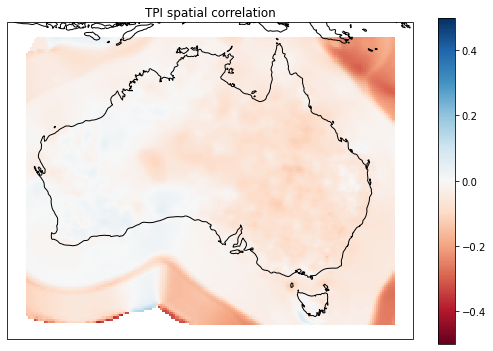

In [69]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(tpi_spatial_da.lon, tpi_spatial_da.lat, tpi_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('TPI spatial correlation')

In [70]:
tpi_spatial_da=tpi_spatial_da.where(landmask>0)
tpi_SON_spatial_da=tpi_SON_spatial_da.where(landmask>0)
tpi_DJF_spatial_da=tpi_DJF_spatial_da.where(landmask>0)
tpi_MAM_spatial_da=tpi_MAM_spatial_da.where(landmask>0)

NameError: name 'landmask' is not defined

In [71]:
ds3=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/bom_aust_mask_smooth.nc')
landmask=ds3.landmask
tpi_spatial_da=tpi_spatial_da.where(landmask>0)
tpi_SON_spatial_da=tpi_SON_spatial_da.where(landmask>0)
tpi_DJF_spatial_da=tpi_DJF_spatial_da.where(landmask>0)
tpi_MAM_spatial_da=tpi_MAM_spatial_da.where(landmask>0)

Text(0.5, 1.0, 'TPI spatial correlation')

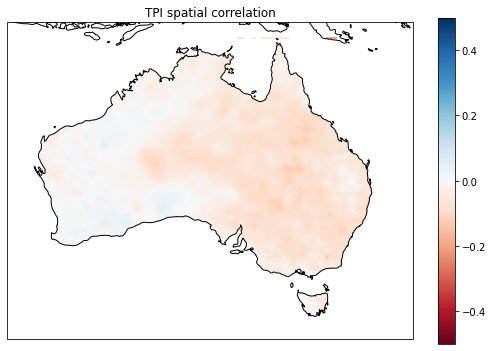

In [72]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(tpi_spatial_da.lon, tpi_spatial_da.lat, tpi_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('TPI spatial correlation')

Text(0.5, 1.0, 'TPI spatial correlation SON')

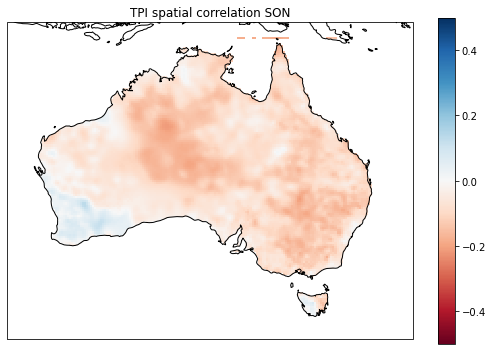

In [73]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(tpi_SON_spatial_da.lon, tpi_SON_spatial_da.lat, tpi_SON_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('TPI spatial correlation SON')

Text(0.5, 1.0, 'TPI spatial correlation DJF')

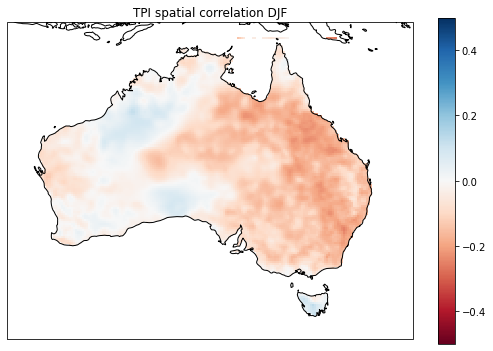

In [74]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(tpi_DJF_spatial_da.lon, tpi_DJF_spatial_da.lat, tpi_DJF_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('TPI spatial correlation DJF')

Text(0.5, 1.0, 'TPI spatial correlation MAM')

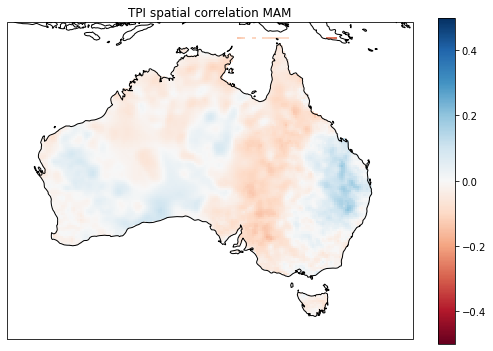

In [75]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(tpi_MAM_spatial_da.lon, tpi_MAM_spatial_da.lat, tpi_MAM_spatial_da, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('TPI spatial correlation MAM')

In [76]:
rr_summer=rr_DJF.resample(time='AS-DEC').mean()
rr_spring=rr_SON.resample(time='AS-SEP').mean()
rr_autumn=rr_MAM.resample(time='AS-MAR').mean()

In [77]:
rr_summer

<xarray.DataArray 'rr' (time: 116, lat: 139, lon: 178)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.2765970e-02, 1.2744010e-02, 8.6318469e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.6648536e-02, 1.5068255e-02, 7.3905401e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.0775454e-02, 1.7575208e-02, 8.8982591e-03],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.3187512e-02, 1.8370364e-02, 1.2193953e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.8484987e-02, 2.1432407e-02, 1.0203692e-02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.3997858e-02, 2.4721622e-02, 1.2275611e-02],
...
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.8468195e-05, 2.7865754e-05, 1.9321200e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.3017679e-05, 1.6827951e-05, 1.1758759e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.3318909e-05, 9.8177343e-06, 9.2709333e-06]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.8130431e+00, 4.8799281e+00, 4.9455099e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.7912354e+00, 4.8595881e+00, 4.9268494e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.7722063e+00, 4.8416190e+00, 4.9099784e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         6.8173060e-05, 4.7976762e-05, 3.2399959e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.1403091e-05, 2.9303776e-05, 1.9888335e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.4429102e-05, 1.7363127e-05, 1.5873529e-05]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [78]:
positive_DJF_rr=rr_summer.where(tpi_summer > 0, drop = True)
negative_DJF_rr=rr_summer.where(tpi_summer < 0, drop = True)
positive_SON_rr=rr_spring.where(tpi_spring > 0, drop = True)
negative_SON_rr=rr_spring.where(tpi_spring < 0, drop = True)
positive_MAM_rr=rr_autumn.where(tpi_autumn > 0, drop = True)
negative_MAM_rr=rr_autumn.where(tpi_autumn < 0, drop = True)

In [79]:
positive_DJF_rr

<xarray.DataArray 'rr' (time: 40, lat: 139, lon: 178)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.27659699e-02, 1.27440104e-02, 8.63184687e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.66485363e-02, 1.50682554e-02, 7.39054009e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.07754539e-02, 1.75752081e-02, 8.89825914e-03],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.31875123e-02, 1.83703639e-02, 1.21939527e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.84849869e-02, 2.14324072e-02, 1.02036921e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.39978577e-02, 2.47216225e-02, 1.22756111e-02],
...
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.20401353e-04, 8.75474434e-05, 6.09082308e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         7.12493566e-05, 5.23548770e-05, 3.67463072e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.06928120e-05, 3.01983091e-05, 2.86814447e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.12002134e+00, 5.18228436e+00, 5.21852446e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.06110048e+00, 5.14705372e+00, 5.21175241e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.00172997e+00, 5.09143448e+00, 5.18022251e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.91152561e-04, 1.38110277e-04, 9.55392825e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.15050549e-04, 8.38360065e-05, 5.84126101e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.70303634e-05, 4.92054278e-05, 4.62984317e-05]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 1996-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [80]:
negative_DJF_rr

<xarray.DataArray 'rr' (time: 76, lat: 139, lon: 178)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.68900485e-02, 2.04309728e-02, 1.37665095e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.33733314e-02, 2.42939759e-02, 1.17841633e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.04813306e-02, 2.85210218e-02, 1.41800949e-02],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.79728878e-02, 2.70567965e-02, 1.85940582e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.65378070e-02, 3.22760604e-02, 1.61951091e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.58541247e-02, 3.78793441e-02, 1.94653459e-02],
...
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.84681953e-05, 2.78657535e-05, 1.93211999e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.30176793e-05, 1.68279512e-05, 1.17587588e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.33189087e-05, 9.81773428e-06, 9.27093333e-06]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.81304312e+00, 4.87992811e+00, 4.94550991e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.79123545e+00, 4.85958815e+00, 4.92684937e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.77220631e+00, 4.84161901e+00, 4.90997839e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.81730598e-05, 4.79767623e-05, 3.23999593e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.14030910e-05, 2.93037756e-05, 1.98883354e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.44291023e-05, 1.73631270e-05, 1.58735293e-05]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1907-12-01 1908-12-01 ... 2014-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

(array([7.50007e+05, 1.47699e+05, 6.87180e+04, 1.97280e+04, 2.74800e+03,
        4.58000e+02, 1.99000e+02, 8.40000e+01, 3.00000e+01, 9.00000e+00]),
 array([ 0.       ,  3.7710013,  7.5420027, 11.3130045, 15.084005 ,
        18.855007 , 22.626009 , 26.39701  , 30.16801  , 33.939014 ,
        37.710014 ], dtype=float32),
 <BarContainer object of 10 artists>)

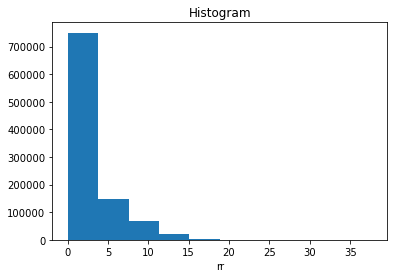

In [81]:
positive_DJF_rr.plot()

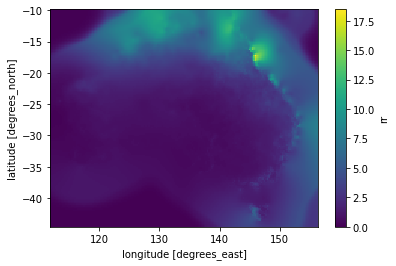

In [82]:
positive_DJF_rr.mean(dim='time').plot()

In [83]:
rr_climate=rr.groupby('time.month').mean(dim='time')
rr_anomaly=(rr.groupby('time.month')-rr_climate)
rra_DJF=rr_anomaly.groupby('time.season')['DJF']
rra_summer=rra_DJF.resample(time='AS-DEC').mean()
rra_SON=rr_anomaly.groupby('time.season')['SON']
rra_spring=rra_SON.resample(time='AS-SEP').mean()
rra_MAM=rr_anomaly.groupby('time.season')['MAM']
rra_autumn=rra_MAM.resample(time='AS-MAR').mean()

In [84]:
rra_summer

<xarray.DataArray 'rr' (time: 117, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.9133945 ,
         -3.8893409 , -3.7967856 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.9271827 ,
         -3.9626741 , -3.793651  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.937211  ,
         -3.9988317 , -3.9497159 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -3.4174888 ,
         -2.9050148 , -2.4563668 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.3822024 ,
         -2.8750331 , -2.4323716 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.312883  ,
         -2.8169312 , -2.5540478 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -3.5746205 ,
         -3.5457666 , -3.452223  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.581537  ,
         -3.610698  , -3.4451993 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.584402  ,
         -3.6389492 , -3.585188  ],
...
        [ 0.        ,  0.        ,  0.        , ..., -3.1678295 ,
         -2.7209141 , -2.3317091 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.1357841 ,
         -2.6937027 , -2.3096762 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.0743377 ,
         -2.6424408 , -2.4145408 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.5843718 ,
         -0.49767494, -0.37047863],
        [ 0.        ,  0.        ,  0.        , ..., -0.60996556,
         -0.57435894, -0.37386227],
        [ 0.        ,  0.        ,  0.        , ..., -0.6308296 ,
         -0.61550236, -0.50857615],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.6686995 ,
         -2.35285   , -2.0824893 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6430602 ,
         -2.3311243 , -2.0643432 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.5973122 ,
         -2.2935078 , -2.1355724 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2015-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [85]:
rr_climate=rr_modern.groupby('time.month').mean(dim='time')
rr_anomaly=(rr_modern.groupby('time.month')-rr_climate)
rra_DJF=rr_anomaly.groupby('time.season')['DJF']
rra_summer=rra_DJF.resample(time='AS-DEC').mean()
rra_SON=rr_anomaly.groupby('time.season')['SON']
rra_spring=rra_SON.resample(time='AS-SEP').mean()
rra_MAM=rr_anomaly.groupby('time.season')['MAM']
rra_autumn=rra_MAM.resample(time='AS-MAR').mean()

In [86]:
rra_summer

<xarray.DataArray 'rr' (time: 116, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.879758  ,
         -3.8539343 , -3.759096  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.8936327 ,
         -3.9278355 , -3.7557826 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.9037004 ,
         -3.9642215 , -3.913086  ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -3.447205  ,
         -2.9302754 , -2.477726  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.4116125 ,
         -2.900033  , -2.4535224 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.34169   ,
         -2.8414264 , -2.5762568 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -3.55389   ,
         -3.523605  , -3.4281704 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5609381 ,
         -3.5891368 , -3.421037  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5638897 ,
         -3.6176598 , -3.5622423 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -3.1954205 ,
         -2.7446063 , -2.3520072 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.163079  ,
         -2.7171457 , -2.3297737 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.1010864 ,
         -2.6654298 , -2.4355474 ]],

       [[ 0.        ,  0.        ,  0.        , ...,  1.8568587 ,
          1.987359  ,  2.1598716 ],
        [ 0.        ,  0.        ,  0.        , ...,  1.8335278 ,
          1.9136875 ,  2.159473  ],
        [ 0.        ,  0.        ,  0.        , ...,  1.8174953 ,
          1.8780677 ,  2.0303936 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.691898  ,
         -2.3733044 , -2.1005943 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6660385 ,
         -2.3513916 , -2.0822918 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.619895  ,
         -2.3134494 , -2.1541407 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [87]:
rra_spring

<xarray.DataArray 'rr' (time: 115, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -2.8008976 ,
         -2.7577946 , -2.6725433 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.791012  ,
         -2.7930129 , -2.6532464 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7782354 ,
         -2.7983358 , -2.7392743 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.814518  ,
         -2.427907  , -2.0946777 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7926216 ,
         -2.410639  , -2.0820558 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7420614 ,
         -2.370055  , -2.1724484 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -2.784853  ,
         -2.7488353 , -2.6665132 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7722547 ,
         -2.7825146 , -2.648149  ],
        [ 0.        ,  0.        ,  0.        , ..., -2.756665  ,
         -2.7861779 , -2.7331927 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -2.8143816 ,
         -2.4278061 , -2.0946062 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7925346 ,
         -2.4105747 , -2.08201   ],
        [ 0.        ,  0.        ,  0.        , ..., -2.742008  ,
         -2.3700154 , -2.1724107 ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.03648055,
          0.12491   ,  0.25033894],
        [ 0.        ,  0.        ,  0.        , ...,  0.0211736 ,
          0.06576105,  0.2494938 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.01057132,
          0.03836946,  0.14226425],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.8144894 ,
         -2.4278858 , -2.0946627 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7926028 ,
         -2.4106252 , -2.0820458 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7420495 ,
         -2.3700466 , -2.1724403 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [88]:
positive_DJF_rr=rra_summer.where(tpi_summer > 0, drop = True)
negative_DJF_rr=rra_summer.where(tpi_summer < 0, drop = True)
positive_SON_rr=rra_spring.where(tpi_spring > 0, drop = True)
negative_SON_rr=rra_spring.where(tpi_spring < 0, drop = True)
positive_MAM_rr=rra_autumn.where(tpi_autumn > 0, drop = True)
negative_MAM_rr=rra_autumn.where(tpi_autumn < 0, drop = True)

In [89]:
positive_DJF_rr

<xarray.DataArray 'rr' (time: 40, lat: 139, lon: 178)>
array([[[ 0.       ,  0.       ,  0.       , ..., -3.879758 ,
         -3.8539343, -3.759096 ],
        [ 0.       ,  0.       ,  0.       , ..., -3.8936327,
         -3.9278355, -3.7557826],
        [ 0.       ,  0.       ,  0.       , ..., -3.9037004,
         -3.9642215, -3.913086 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ..., -3.447205 ,
         -2.9302754, -2.477726 ],
        [ 0.       ,  0.       ,  0.       , ..., -3.4116125,
         -2.900033 , -2.4535224],
        [ 0.       ,  0.       ,  0.       , ..., -3.34169  ,
         -2.8414264, -2.5762568]],

       [[ 0.       ,  0.       ,  0.       , ..., -3.55389  ,
         -3.523605 , -3.4281704],
        [ 0.       ,  0.       ,  0.       , ..., -3.5609381,
         -3.5891368, -3.421037 ],
        [ 0.       ,  0.       ,  0.       , ..., -3.5638897,
         -3.6176598, -3.5622423],
...
        [ 0.       ,  0.       ,  0.       , ..., -3.1953385,
         -2.744547 , -2.3519657],
        [ 0.       ,  0.       ,  0.       , ..., -3.1630306,
         -2.71711  , -2.3297489],
        [ 0.       ,  0.       ,  0.       , ..., -3.101059 ,
         -2.6654093, -2.4355278]],

       [[ 0.       ,  0.       ,  0.       , ...,  1.5329443,
          1.640309 ,  1.7781597],
        [ 0.       ,  0.       ,  0.       , ...,  1.4616772,
          1.5364847,  1.7805113],
        [ 0.       ,  0.       ,  0.       , ...,  1.3938423,
          1.4490529,  1.6057048],
        ...,
        [ 0.       ,  0.       ,  0.       , ..., -3.1952677,
         -2.7444963, -2.3519309],
        [ 0.       ,  0.       ,  0.       , ..., -3.1629868,
         -2.7170784, -2.3297272],
        [ 0.       ,  0.       ,  0.       , ..., -3.101033 ,
         -2.6653907, -2.4355104]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 1996-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

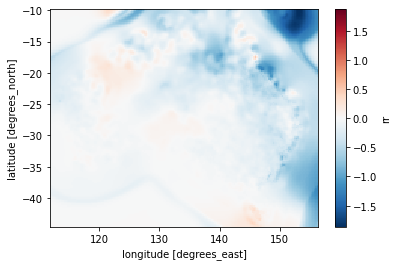

In [90]:
positive_DJF_rr.mean(dim='time').plot()

In [91]:
positive_DJF_mean=positive_DJF_rr.mean(dim='time')
negative_DJF_mean=negative_DJF_rr.mean(dim='time')
positive_SON_mean=positive_SON_rr.mean(dim='time')
negative_SON_mean=negative_SON_rr.mean(dim='time')
positive_MAM_mean=positive_MAM_rr.mean(dim='time')
negative_MAM_mean=negative_MAM_rr.mean(dim='time')

Text(0.5, 1.0, 'IPO positive composite DJF')

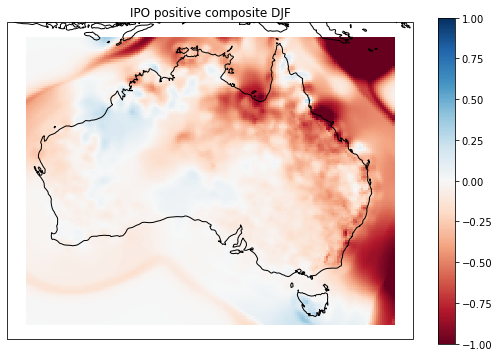

In [92]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(positive_DJF_mean.lon, positive_DJF_mean.lat, positive_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('IPO positive composite DJF')

In [93]:
positive_DJF_mean=positive_DJF_mean.where(landmask>0)
negative_DJF_mean=negative_DJF_mean.where(landmask>0)
positive_SON_mean=positive_SON_mean.where(landmask>0)
negative_SON_mean=negative_SON_mean.where(landmask>0)
positive_MAM_mean=positive_MAM_mean.where(landmask>0)
negative_MAM_mean=negative_MAM_mean.where(landmask>0)

Text(0.5, 1.0, 'IPO positive composite DJF')

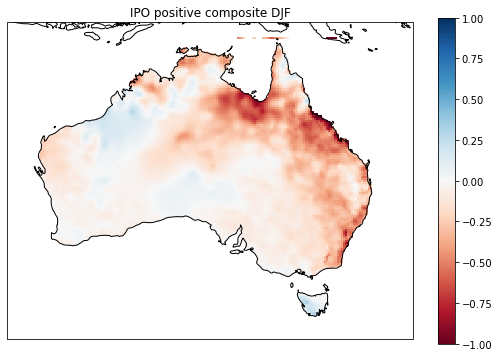

In [94]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(positive_DJF_mean.lon, positive_DJF_mean.lat, positive_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('IPO positive composite DJF')

Text(0.5, 1.0, 'IPO negative composite DJF')

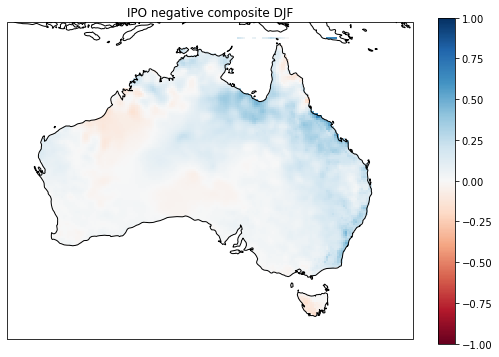

In [95]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(negative_DJF_mean.lon, negative_DJF_mean.lat, negative_DJF_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('IPO negative composite DJF')

Text(0.5, 1.0, 'IPO positive composite SON')

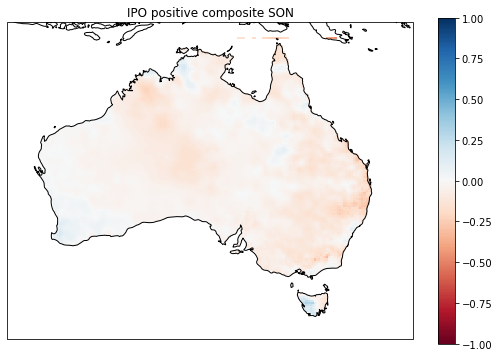

In [96]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(positive_SON_mean.lon, positive_SON_mean.lat, positive_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('IPO positive composite SON')

Text(0.5, 1.0, 'IPO negative composite SON')

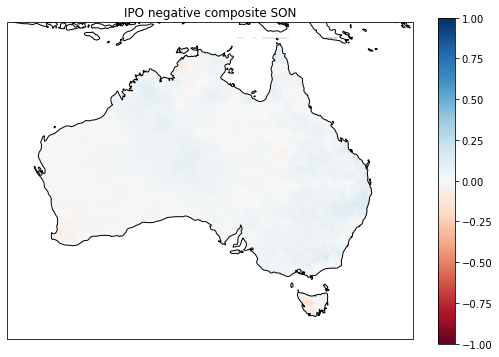

In [97]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(negative_SON_mean.lon, negative_SON_mean.lat, negative_SON_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('IPO negative composite SON')

Text(0.5, 1.0, 'IPO positive composite MAM')

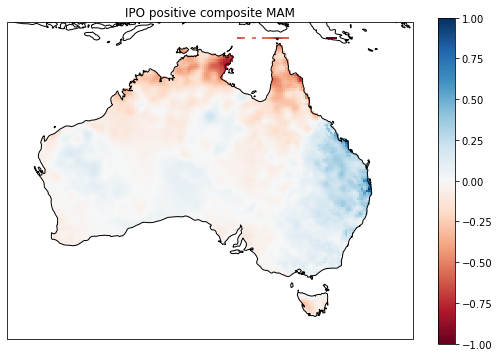

In [98]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(positive_MAM_mean.lon, positive_MAM_mean.lat, positive_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('IPO positive composite MAM')

Text(0.5, 1.0, 'IPO negative composite MAM')

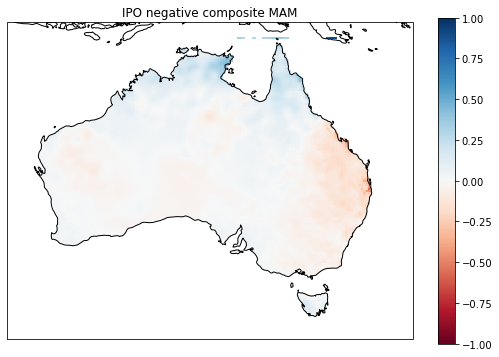

In [99]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(negative_MAM_mean.lon, negative_MAM_mean.lat, negative_MAM_mean, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1, 1)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('IPO negative composite MAM')

In [100]:
negative_SON_mean

<xarray.DataArray 'rr' (lat: 139, lon: 178)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [101]:
negative_SON_rr

<xarray.DataArray 'rr' (time: 75, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -2.786095  ,
         -2.7494965 , -2.6669083 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7736318 ,
         -2.783151  , -2.6484158 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7580223 ,
         -2.7867515 , -2.7334797 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.2223082 ,
         -2.0117826 , -1.8126291 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.206562  ,
         -1.9987489 , -1.8028316 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.171292  ,
         -1.968783  , -1.8560797 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -2.791344  ,
         -2.7524128 , -2.668889  ],
        [ 0.        ,  0.        ,  0.        , ..., -2.779955  ,
         -2.7867362 , -2.6501312 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7655706 ,
         -2.791092  , -2.735647  ],
...
        [ 0.        ,  0.        ,  0.        , ..., -2.8143816 ,
         -2.4278061 , -2.0946062 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7925346 ,
         -2.4105747 , -2.08201   ],
        [ 0.        ,  0.        ,  0.        , ..., -2.742008  ,
         -2.3700154 , -2.1724107 ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.03648055,
          0.12491   ,  0.25033894],
        [ 0.        ,  0.        ,  0.        , ...,  0.0211736 ,
          0.06576105,  0.2494938 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.01057132,
          0.03836946,  0.14226425],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.8144894 ,
         -2.4278858 , -2.0946627 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7926028 ,
         -2.4106252 , -2.0820458 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7420495 ,
         -2.3700466 , -2.1724403 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1908-09-01 1909-09-01 ... 2014-09-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [102]:
negative_MAM_rr

<xarray.DataArray 'rr' (time: 75, lat: 139, lon: 178)>
array([[[ 0.       ,  0.       ,  0.       , ..., -4.873438 ,
         -4.857937 , -4.7558136],
        [ 0.       ,  0.       ,  0.       , ..., -4.8712997,
         -4.9268994, -4.741508 ],
        [ 0.       ,  0.       ,  0.       , ..., -4.86511  ,
         -4.9521255, -4.908926 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ..., -3.5109322,
         -3.0395052, -2.6126125],
        [ 0.       ,  0.       ,  0.       , ..., -3.4812381,
         -3.0137014, -2.5925024],
        [ 0.       ,  0.       ,  0.       , ..., -3.4191914,
         -2.960409 , -2.7132328]],

       [[ 0.       ,  0.       ,  0.       , ..., -4.8204246,
         -4.8273845, -4.7345963],
        [ 0.       ,  0.       ,  0.       , ..., -4.8105397,
         -4.891712 , -4.7233157],
        [ 0.       ,  0.       ,  0.       , ..., -4.7966504,
         -4.912321 , -4.888038 ],
...
        [ 0.       ,  0.       ,  0.       , ..., -3.5105927,
         -3.0392563, -2.612438 ],
        [ 0.       ,  0.       ,  0.       , ..., -3.4810188,
         -3.01354  , -2.5923889],
        [ 0.       ,  0.       ,  0.       , ..., -3.419054 ,
         -2.9603078, -2.7131376]],

       [[ 0.       ,  0.       ,  0.       , ...,  1.5336103,
          1.7021831,  1.9585547],
        [ 0.       ,  0.       ,  0.       , ...,  1.5452527,
          1.6475984,  1.982211 ],
        [ 0.       ,  0.       ,  0.       , ...,  1.5654745,
          1.6415807,  1.8378953],
        ...,
        [ 0.       ,  0.       ,  0.       , ..., -3.5104969,
         -3.0391865, -2.6123888],
        [ 0.       ,  0.       ,  0.       , ..., -3.480959 ,
         -3.0134964, -2.5923584],
        [ 0.       ,  0.       ,  0.       , ..., -3.419019 ,
         -2.960282 , -2.7131128]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1908-03-01 1909-03-01 ... 2014-03-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0